# Analayse détaillé des meilleurs clusters

Dans ce notebook, on analysera plus en détail les meilleurs clusters précédemment trouvés parmi toutes les combinaisons d'embedding et de clusterings. 

Tout d'abord on cherchera à détermine la taille optimale pour ces clusters en calculant les scores de qualité des clusters en fonction du nombre de clusters.

Pour rappel, les critères de qualités des scores sont : 
- score silhoutte : proche de 1 
- score Davies-Bouldin : proche de 0 
- Calinski-Harabasz : le plus élévé possible

In [1]:
from main2 import Kmeans_clustering, hierarchical_clustering, glove_embeddings, SVD_embeddings, score_function

[nltk_data] Downloading package punkt to /home/damien/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Etude de la taille optimale des clusters 

def iter_pipeline(dataframe, embedding_method, clustering_method, tailles_clusters):
    print(f"start embedding for {embedding_method.__name__} and {clustering_method.__name__}")
    embeddings = embedding_method(dataframe)
    print("clustering")
    output = []
    for i in tailles_clusters :
        labels = clustering_method(i, embeddings, embedding_method.__name__)
        scores = score_function(embeddings, labels)
        output.append([i,scores])
    print(output)
    return output

In [3]:
import matplotlib.pyplot as plt

# Trace les graphes score en fonction de la taille des clusters

def tracer_graph_iter(name, iter_scores):

    taille_cluster = [x[0] for x in iter_scores]
    silhouette_score = [x[1][0] for x in iter_scores]
    davies_bouldin_score = [x[1][1] for x in iter_scores]
    calinski_harabasz_score = [x[1][2] for x in iter_scores]

    fig, axs = plt.subplots(3, 1, figsize=(10, 18))  # 3 lignes, 1 colonne
    
    fig.suptitle(name, fontsize=16, fontweight='bold', y=0.95)
    
    # Premier graphe : silhouette_score
    axs[0].plot(taille_cluster, silhouette_score, marker='o', linestyle='-', color='blue')
    axs[0].set_title('Silhouette Score en fonction des tailles de clusters')
    axs[0].set_xlabel('Taille Cluster')
    axs[0].set_ylabel('Silhouette Score')
    axs[0].grid(True)
    
    # Deuxième graphe : davies_bouldin_score
    axs[1].plot(taille_cluster, davies_bouldin_score, marker='o', linestyle='--', color='green')
    axs[1].set_title('Davies-Bouldin Score en fonction des tailles de clusters')
    axs[1].set_xlabel('Taille Cluster')
    axs[1].set_ylabel('Davies-Bouldin Score')
    axs[1].grid(True)
    
    # Troisième graphe : calinski_harabasz_score
    axs[2].plot(taille_cluster, calinski_harabasz_score, marker='o', linestyle='-.', color='red')
    axs[2].set_title('Calinski-Harabasz Score en fonction des tailles de clusters')
    axs[2].set_xlabel('Taille Cluster')
    axs[2].set_ylabel('Calinski-Harabasz Score')
    axs[2].grid(True)

    plt.show()


start embedding for glove_embeddings and Kmeans_clustering
clustering
[[5, (0.07363124, 2.3213622151752227, 42.733309965792714)], [6, (0.06863852, 2.3724680425549582, 37.94935559203283)], [7, (0.06714915, 2.4820754584332936, 33.69751617867139)], [8, (0.052245777, 2.4838045347820037, 30.80050250851106)], [9, (0.05301986, 2.2694839004664544, 29.484235355250725)], [10, (0.048747603, 2.341649545665974, 27.245047553896676)], [11, (0.048497085, 2.198630649927056, 27.69488910972411)], [12, (0.045224246, 2.295133253895005, 25.563584585154164)], [13, (0.049657717, 2.23902592546502, 24.346713883715857)], [14, (0.031291135, 2.1502642888695584, 23.69400587279696)], [15, (0.0270616, 2.141628923970544, 22.934945076125288)]]


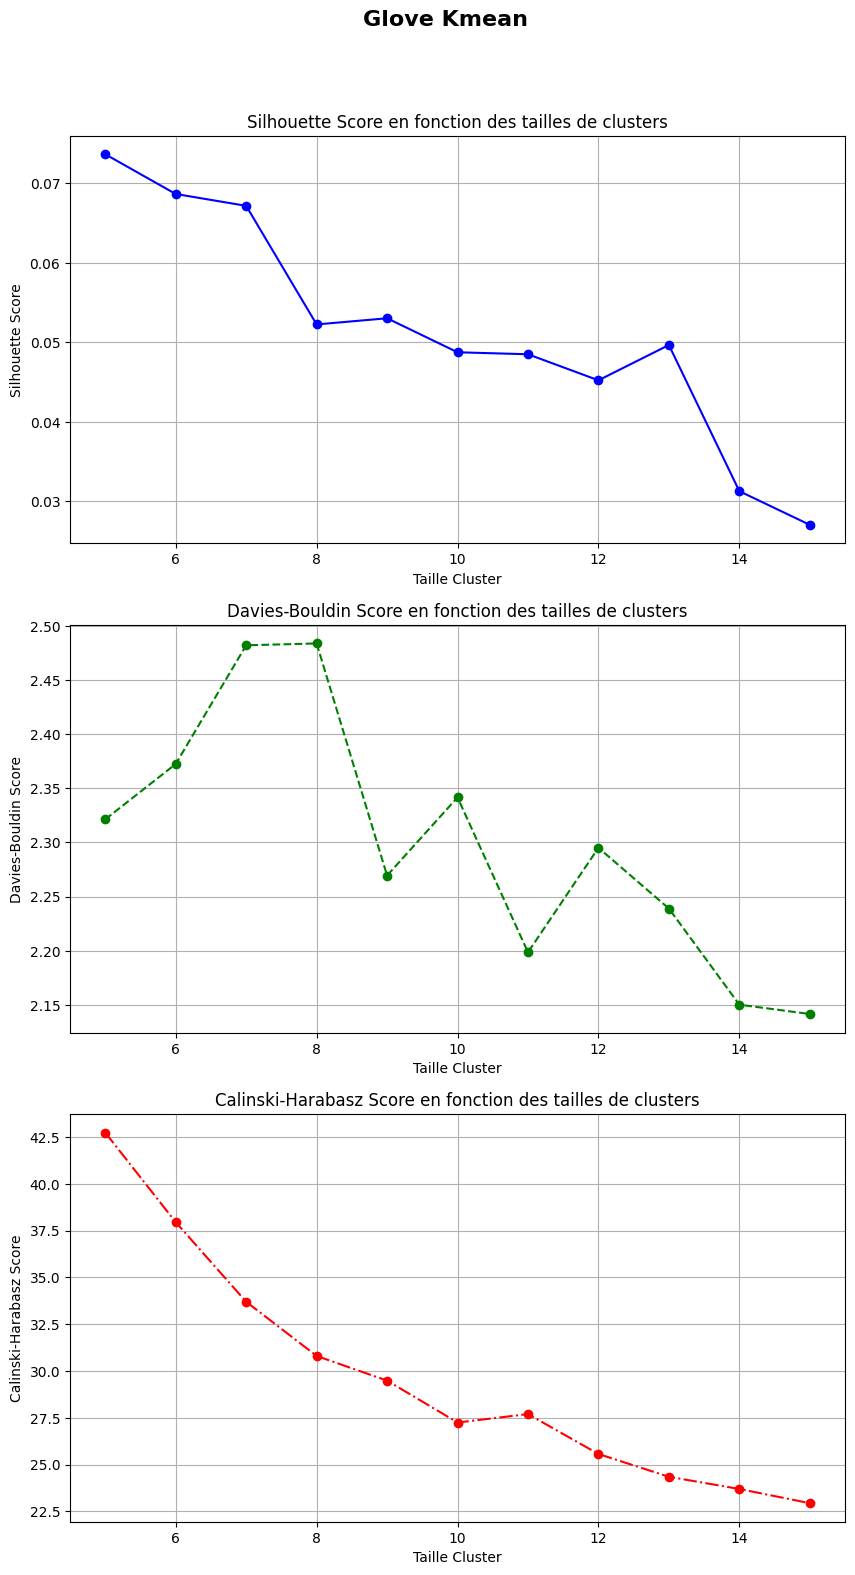

In [4]:
import pandas as pd

data_df = pd.read_csv("Data_csv/data_preprocessed.csv")
range_cluster = range(5,16)

glove_Kmean_iter_scores = iter_pipeline(data_df, glove_embeddings, Kmeans_clustering, range_cluster)
tracer_graph_iter("Glove Kmean", glove_Kmean_iter_scores)

start embedding for glove_embeddings and hierarchical_clustering
clustering
[[5, (0.037637237, 2.3760184201708308, 37.01436953731968)], [6, (0.049966834, 2.352142485900693, 34.241520282369194)], [7, (0.05240429, 2.057581465524492, 32.31028612007464)], [8, (0.06018787, 2.0846996064394103, 30.85458640749719)], [9, (0.039269455, 2.1880949598671036, 29.21950108937905)], [10, (0.041404404, 2.0079896837996105, 27.93754304418413)], [11, (0.042175904, 1.8611462327725838, 26.99804819404414)], [12, (0.042998277, 1.73571958823149, 26.23395856003096)], [13, (0.048565954, 1.7547608137834736, 25.536529728958108)], [14, (0.05307779, 1.740162257466391, 24.83532687183363)], [15, (0.05384036, 1.7270190791151834, 24.126407318024622)]]


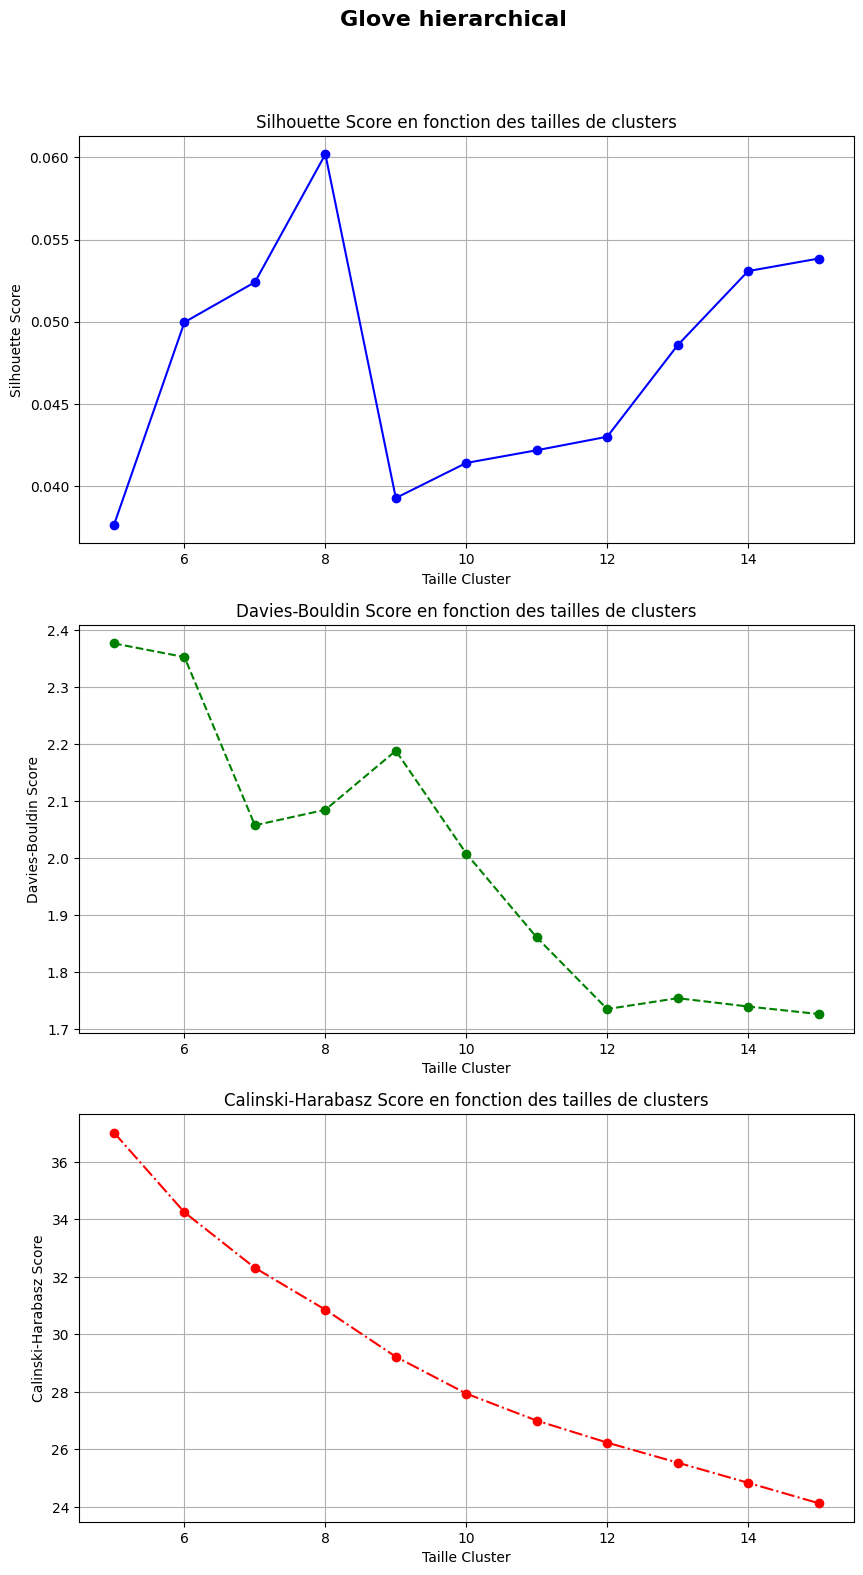

In [5]:
glove_hierarchical_iter_scores = iter_pipeline(data_df, glove_embeddings, hierarchical_clustering, range_cluster)
tracer_graph_iter("Glove hierarchical", glove_hierarchical_iter_scores)

start embedding for SVD_embeddings and Kmeans_clustering
clustering
[[5, (0.4346762394651502, 0.5948904185441116, 679.6459500859966)], [6, (0.42190528129676236, 0.6184307442787423, 767.031731027659)], [7, (0.39025647927541984, 0.6672879759424467, 796.5054861797889)], [8, (0.366826284840623, 0.6946656545581127, 790.4553143233088)], [9, (0.3843057924706842, 0.6777733324886344, 800.3530760976446)], [10, (0.3851589507030136, 0.6984815323831117, 769.7200013621051)], [11, (0.387949081259197, 0.6714970150940408, 853.0299821774166)], [12, (0.35618861380141936, 0.7227763512521217, 862.0041999512538)], [13, (0.3437244224442234, 0.779121116178506, 858.4724756859647)], [14, (0.3378720739799912, 0.8290522217765662, 822.6597163516099)], [15, (0.3284891337906536, 0.8753476272652426, 819.1485965001807)]]


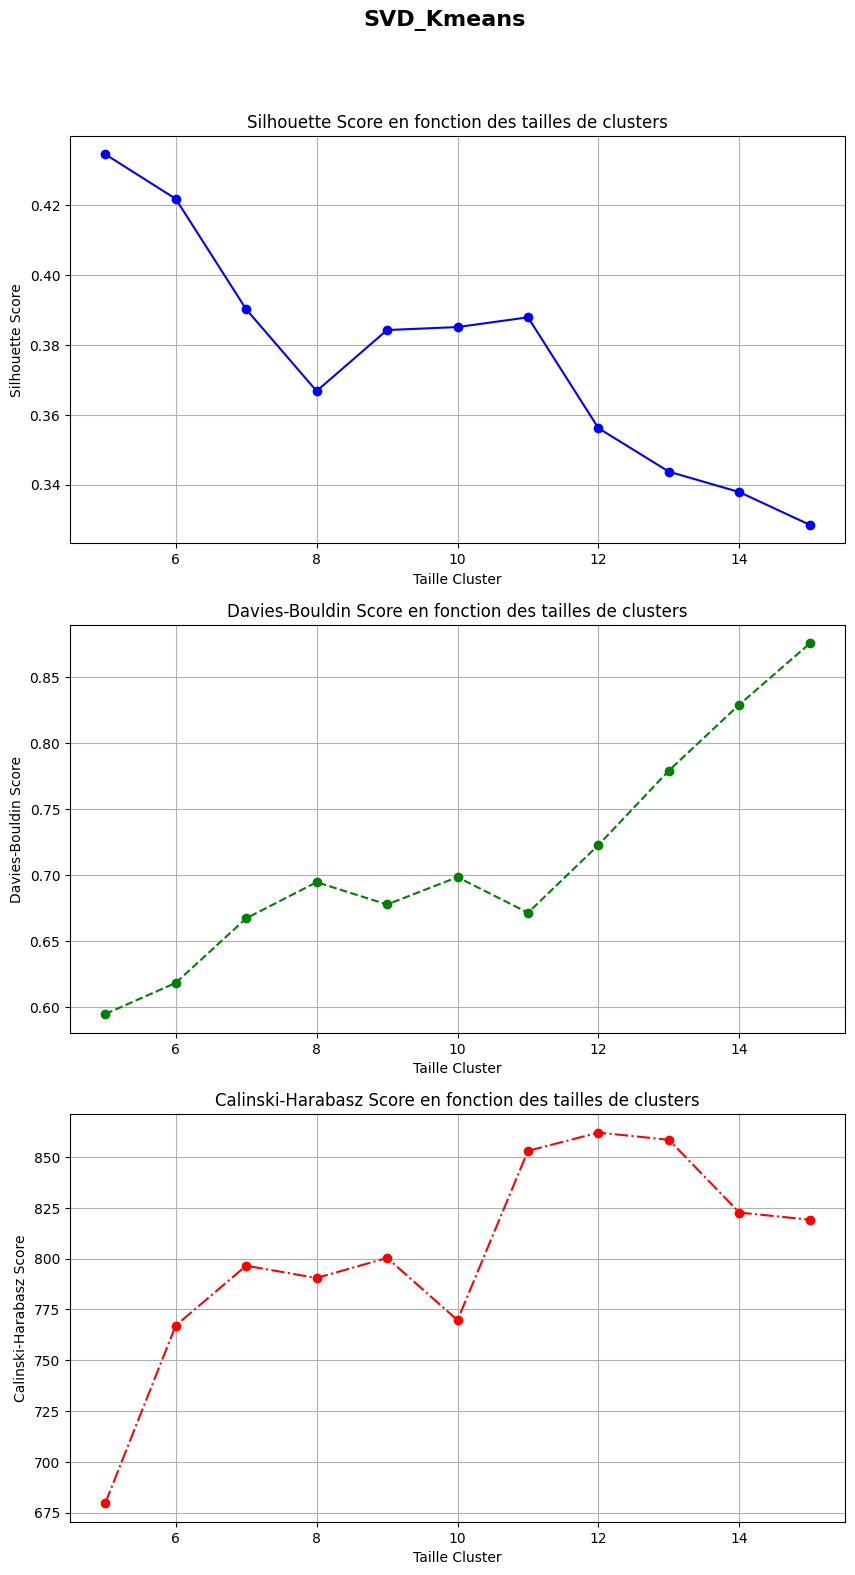

In [6]:
SVD_Kmeans_iter_scores = iter_pipeline(data_df, SVD_embeddings, Kmeans_clustering, range_cluster)
tracer_graph_iter("SVD_Kmeans", SVD_Kmeans_iter_scores)

start embedding for SVD_embeddings and hierarchical_clustering
clustering
[[5, (0.3717755708056061, 0.5821223000850642, 529.2278026700187)], [6, (0.3977555219812905, 0.546338005947759, 618.0954330613415)], [7, (0.37534601176162613, 0.6890914459909003, 684.8135451536325)], [8, (0.3434964559600695, 0.6938547058979996, 699.668031611308)], [9, (0.3503878620242183, 0.6810960491489197, 726.2085410990204)], [10, (0.34884759670825916, 0.6982467084146504, 764.5470482564443)], [11, (0.3090732839412052, 0.7682226074903244, 766.9490573555836)], [12, (0.33088645902458264, 0.7894040935173701, 782.8875747278738)], [13, (0.3331850927250078, 0.7667228268770656, 784.8233051664713)], [14, (0.31695794552985274, 0.8094065430793407, 789.7204077354658)], [15, (0.3188384111415761, 0.8234572122620022, 790.8268518026962)]]


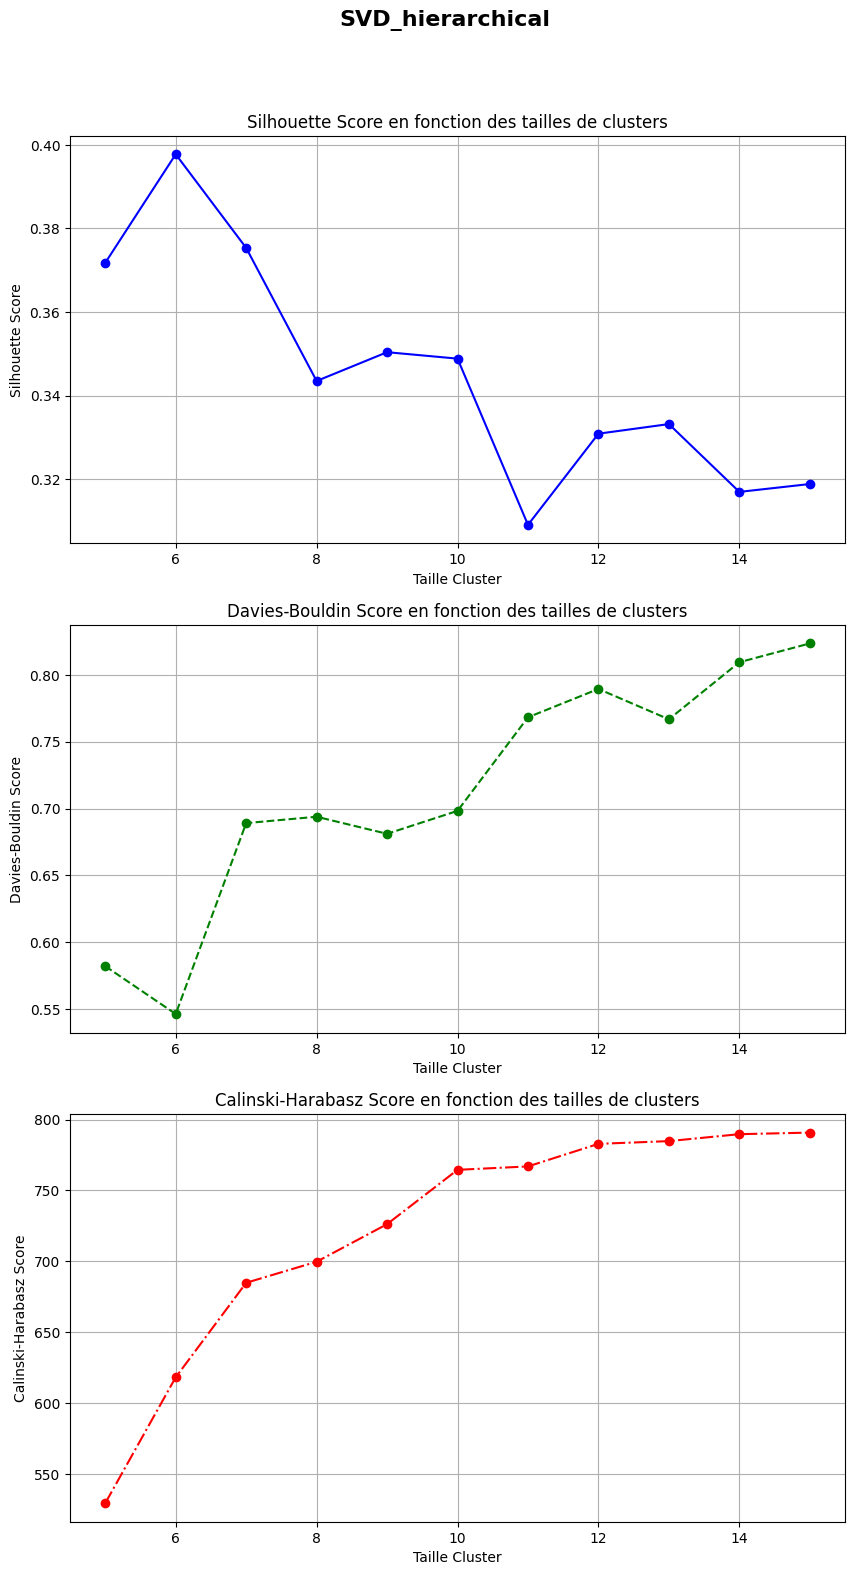

In [7]:
SVD_hierarchical_iter_scores = iter_pipeline(data_df, SVD_embeddings, hierarchical_clustering, range_cluster)
tracer_graph_iter("SVD_hierarchical", SVD_hierarchical_iter_scores)

**Commentaires**

D'après les graphes, les meilleurs combinaisons embeddings, clustering, taille de clusters sont:
- SVD Kmeans 11 clusters (silhoutte : 0.39, Davies : 0.68, Calsinski : 853)
- SVD Hierarchical 12 clusters (silhoutte : 0.33, Davies : 0.79, Calsinski : 782)

On prendra par la suite la combinason SVD Kmeans avec 11 clusters présentant les meilleurs scores et en adéquation avec des 11 thèmes fournis dans l'article.